# Calories Burnt Prediction

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')

### Importing dataset

In [2]:
calories = pd.read_csv('calories.csv')

In [3]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
calories.shape

(15000, 2)

In [5]:
exercise_df = pd.read_csv('exercise.csv')

In [6]:
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
exercise_df.shape

(15000, 8)

In [8]:
calories_df = pd.concat([exercise_df, calories['Calories']], axis=1)

In [9]:
calories_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
calories_df.shape

(15000, 9)

In [11]:
calories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [12]:
calories_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### Visualizing the different features of the dataset

#### Visualizing the gender count

In [13]:
calories_df.Gender.value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

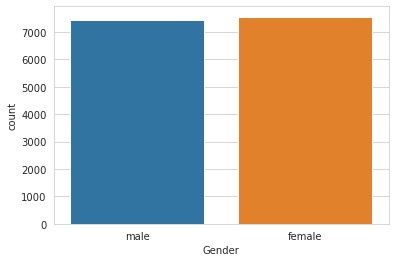

In [14]:
sns.countplot(calories_df.Gender)
plt.show()

#### Distribution of age

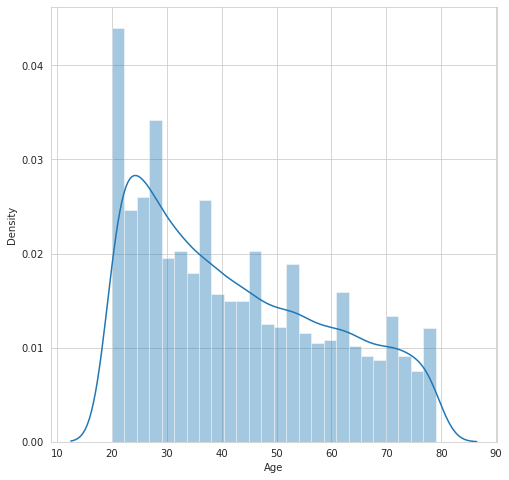

In [15]:
plt.figure(figsize=(8, 8))
sns.distplot(calories_df.Age)
plt.show()

#### Distribution of height

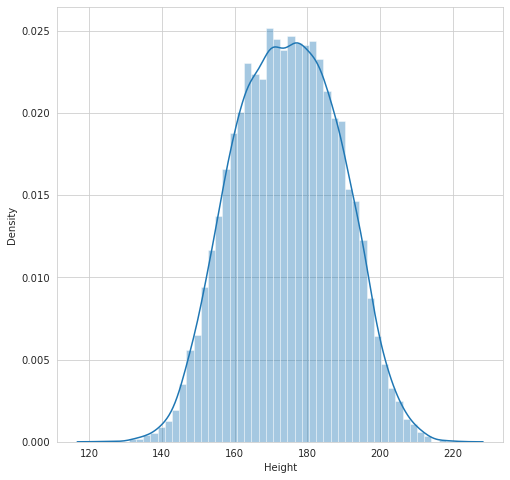

In [16]:
plt.figure(figsize=(8, 8))
sns.distplot(calories_df.Height)
plt.show()

#### Distribution of weight

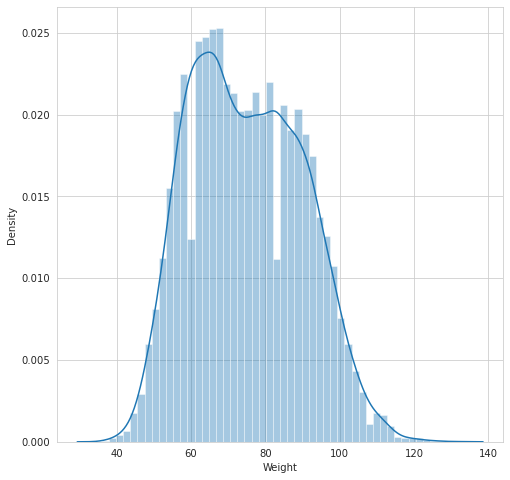

In [17]:
plt.figure(figsize=(8, 8))
sns.distplot(calories_df.Weight)
plt.show()

#### Distribution of Heart Rate

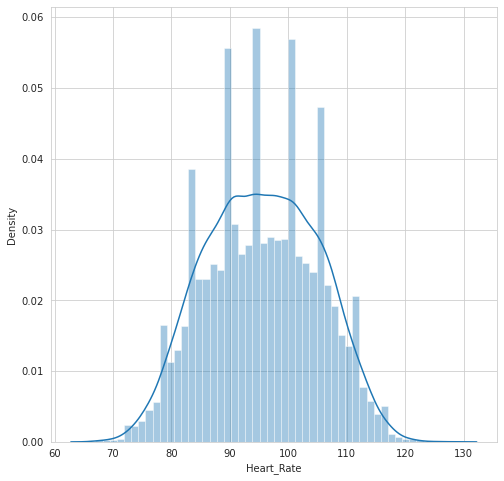

In [18]:
plt.figure(figsize=(8, 8))
sns.distplot(calories_df.Heart_Rate)
plt.show()

#### Distribution of Body Temperature

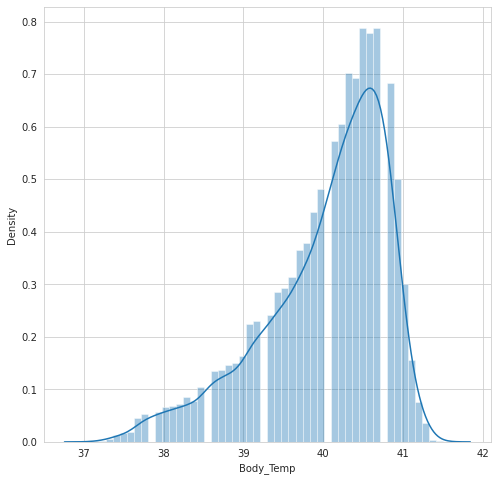

In [19]:
plt.figure(figsize=(8, 8))
sns.distplot(calories_df.Body_Temp)
plt.show()

#### Relation of calories burnt with height, weight and age in different genders

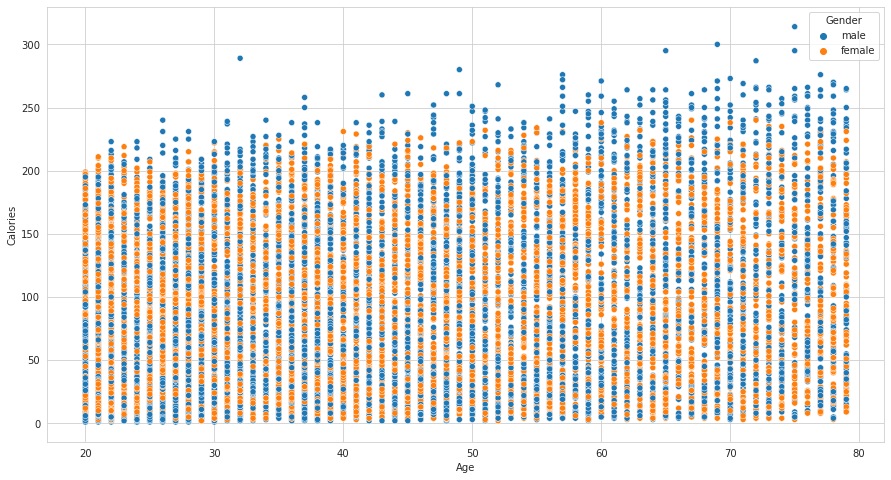

In [20]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = 'Age', y = 'Calories', data=calories_df, hue='Gender')
plt.show()

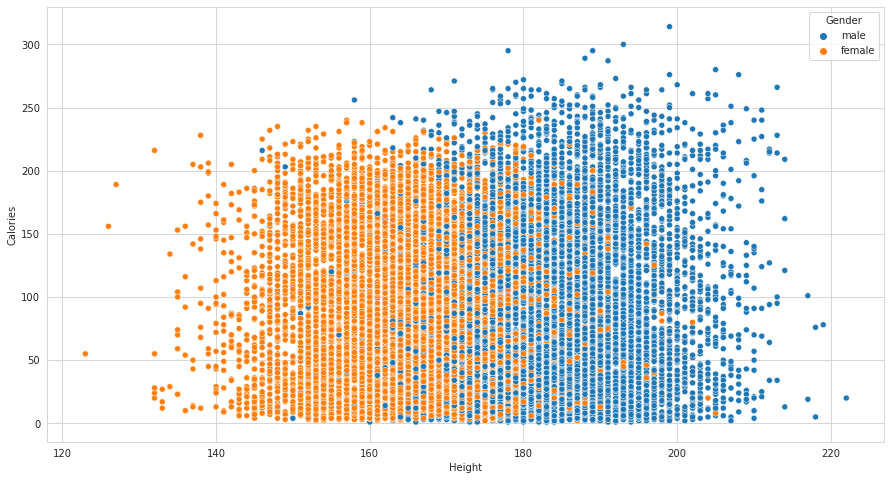

In [21]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = 'Height', y = 'Calories', data=calories_df, hue='Gender')
plt.show()

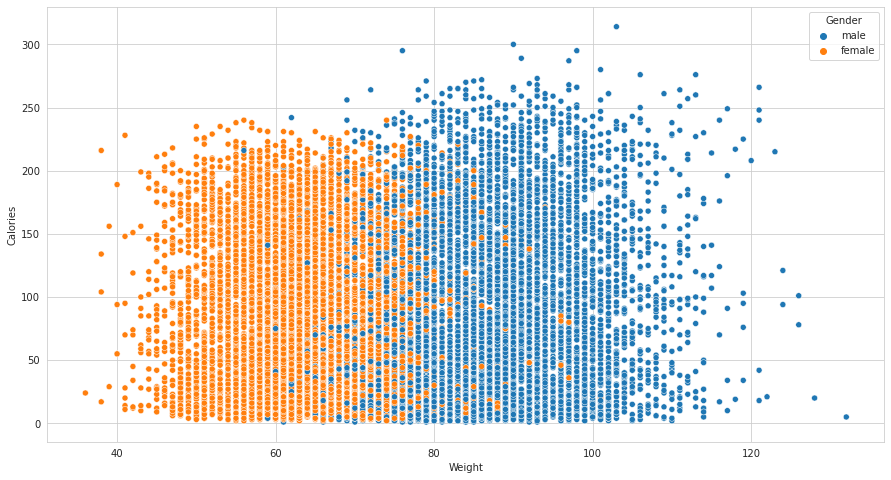

In [22]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = 'Weight', y = 'Calories', data=calories_df, hue='Gender')
plt.show()

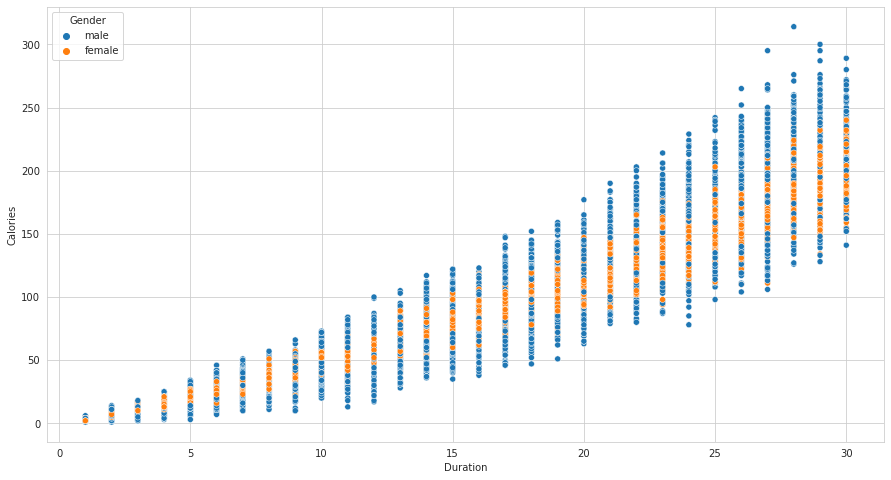

In [23]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = 'Duration', y = 'Calories', data=calories_df, hue='Gender')
plt.show()

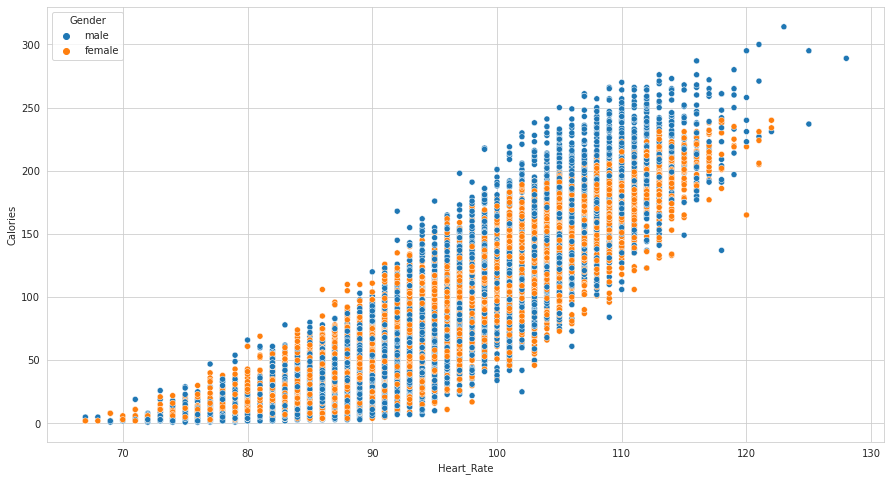

In [24]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = 'Heart_Rate', y = 'Calories', data=calories_df, hue='Gender')
plt.show()

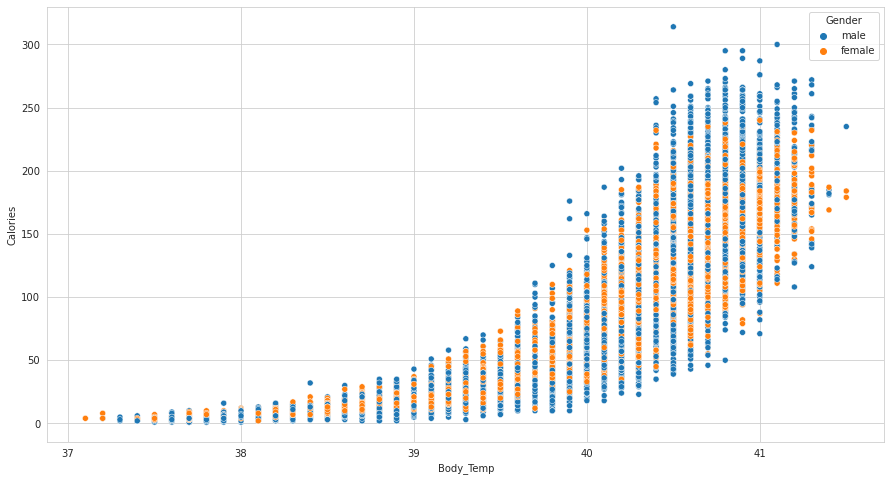

In [25]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = 'Body_Temp', y = 'Calories', data=calories_df, hue='Gender')
plt.show()

### Let's calculate the correlation

In [26]:
correlation = calories_df.corr()
correlation

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


<AxesSubplot:>

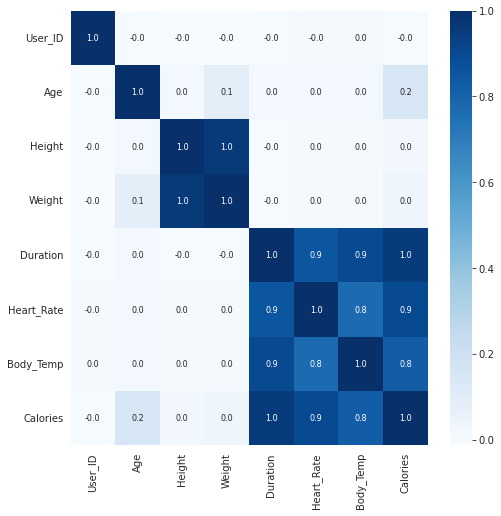

In [27]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, annot=True, fmt='.1f', annot_kws={'size': 8}, cmap='Blues')

### Changing the categorial values to numerical values

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
calories_df['Gender'] = le.fit_transform(calories_df['Gender'])

In [29]:
calories_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


### Splitting the dataset into features and target

In [30]:
X = calories_df.drop(['User_ID', 'Calories'], axis = 1)
y = calories_df.Calories

### Splitting the dataset into training and test set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Fitting the model into the training set

#### Take different model and compare the accuracy

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor, XGBRFRegressor

#### We make a function fit_model

In [33]:
def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    print('The predicted values:\n ', model.predict(X_test))
    print('\nThe accuracy score: ', model.score(X_test, y_test))

### 1. Linear Regression

In [34]:
fit_model(LinearRegression(), X_train, X_test, y_train, y_test)

The predicted values:
  [198.81182363  80.43555305 194.40940033 ...  22.14745631 118.63504926
 -11.98134672]

The accuracy score:  0.9655977245826504


### 2. Decision Tree Regressor

In [35]:
fit_model(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)

The predicted values:
  [194.  75. 206. ...  30. 109.  14.]

The accuracy score:  0.9924803081506833


### 3. Random Forest Regressor

In [36]:
fit_model(RandomForestRegressor(), X_train, X_test, y_train, y_test)

The predicted values:
  [196.34  67.43 195.71 ...  27.62 111.21  14.3 ]

The accuracy score:  0.9976599304689594


### 4. Support Vector Regressor

In [37]:
fit_model(SVR(), X_train, X_test, y_train, y_test)

The predicted values:
  [173.98933661  78.12614834 167.58435712 ...  39.33380228 112.52950835
  -2.09856714]

The accuracy score:  0.9362407240217101


### 5. XGB Regressor

In [38]:
fit_model(XGBRegressor(), X_train, X_test, y_train, y_test)

The predicted values:
  [197.55533   71.09331  196.11734  ...  27.588661 107.2924    14.824119]

The accuracy score:  0.9987258438998257


### 6. XGBRF Regressor

In [39]:
fit_model(XGBRFRegressor(), X_train, X_test, y_train, y_test)

The predicted values:
  [187.84512   66.28941  190.45018  ...  26.899887 114.96893   16.674515]

The accuracy score:  0.9836820833841424
